<a href="https://colab.research.google.com/github/subramanya4shenoy/MachineLearningNbs/blob/main/HOML/ch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HOML Chapter 2 – End-to-end Machine Learning project**

In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
  tarball_path = Path("datasets/housing.tgz")
  if not tarball_path.is_file():
    Path("datasets").mkdir(parents=True, exist_ok=True)
    url = "https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
      housing_tarball.extractall(path="dataset")
  return pd.read_csv(Path("dataset/housing/housing.csv"))

In [2]:
housing = load_housing_data()

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


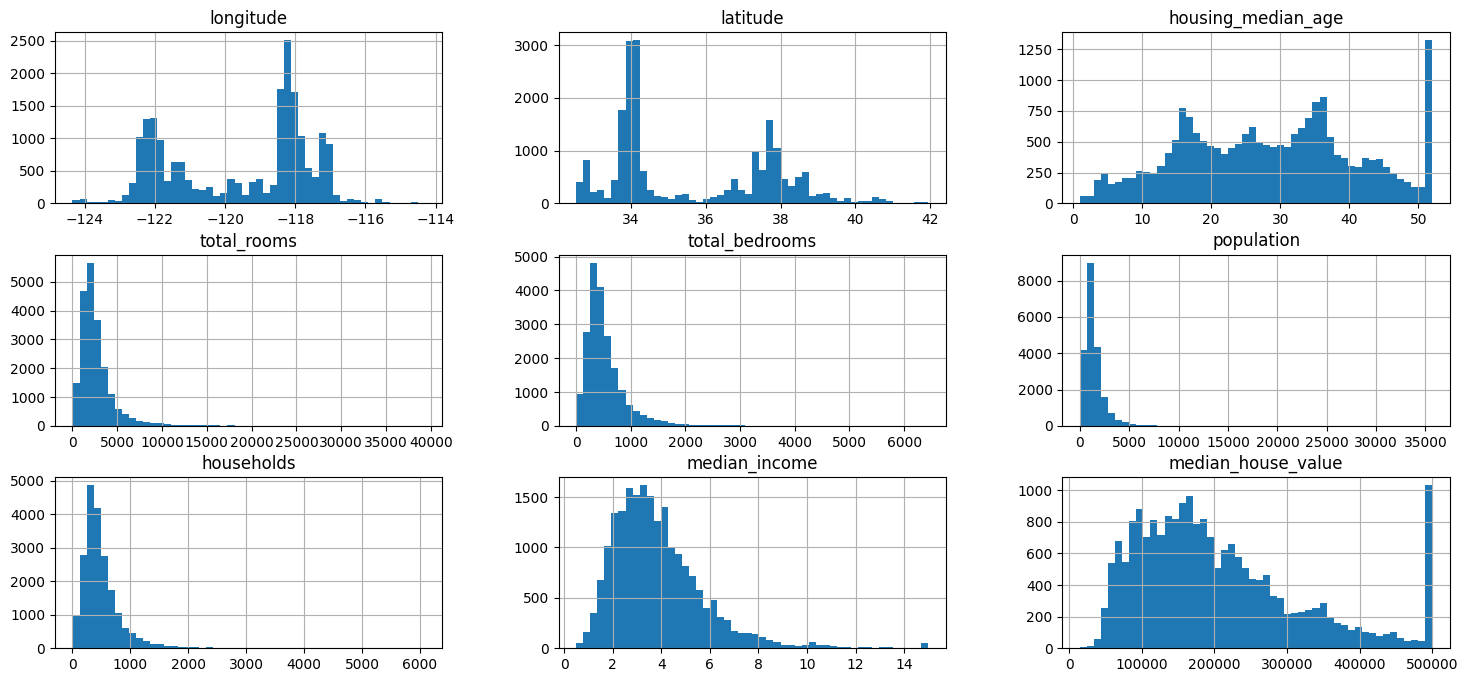

In [5]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(18,8))
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

print(train_set.shape)
print(test_set.shape)

(16512, 10)
(4128, 10)


In [7]:
import numpy as np

housing['income_cat'] = pd.cut(housing['median_income'], bins=[0, 1.5, 3.0, 4.5, 6, np.inf], labels=[1,2,3,4,5])

<Axes: >

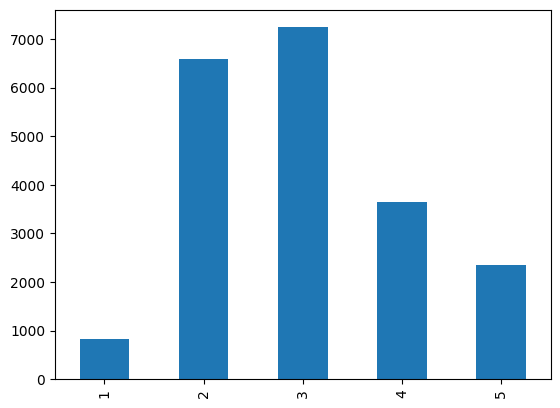

In [8]:
housing['income_cat'].value_counts().sort_index().plot.bar()

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

# splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
# strat_splits = []
# for train_index, test_index in splitter.split(housing, housing['income_cat']):
#   start_train_set_n = housing.iloc[train_index]
#   strat_test_set_n = housing.iloc[test_index]
#   strat_splits.append([start_train_set_n, strat_test_set_n])

In [10]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing['income_cat'], random_state=42)

In [11]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [12]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop('income_cat', axis=1, inplace=True)

In [13]:
housing = strat_train_set.copy()

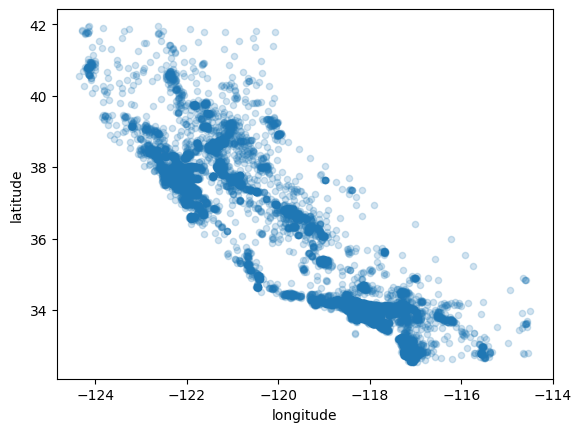

In [14]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2)
plt.show()

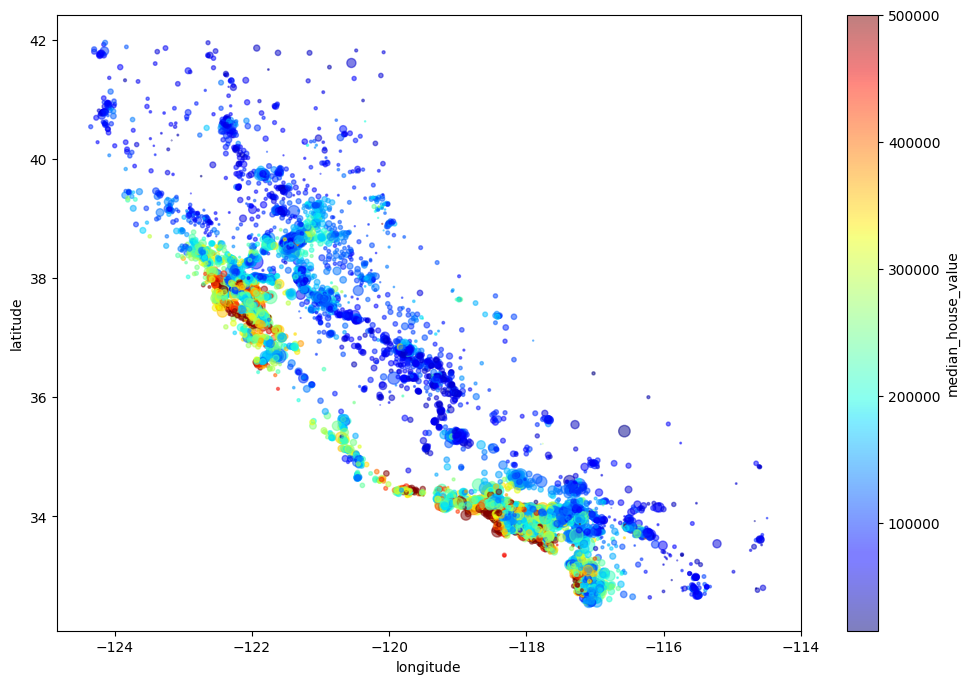

In [15]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5, figsize=(12,8), s=housing["population"]/100, c="median_house_value", cmap="jet")
plt.show()

In [16]:
corr_matrix = housing.corr()
corr_matrix

<ipython-input-16-35947d78f589>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000


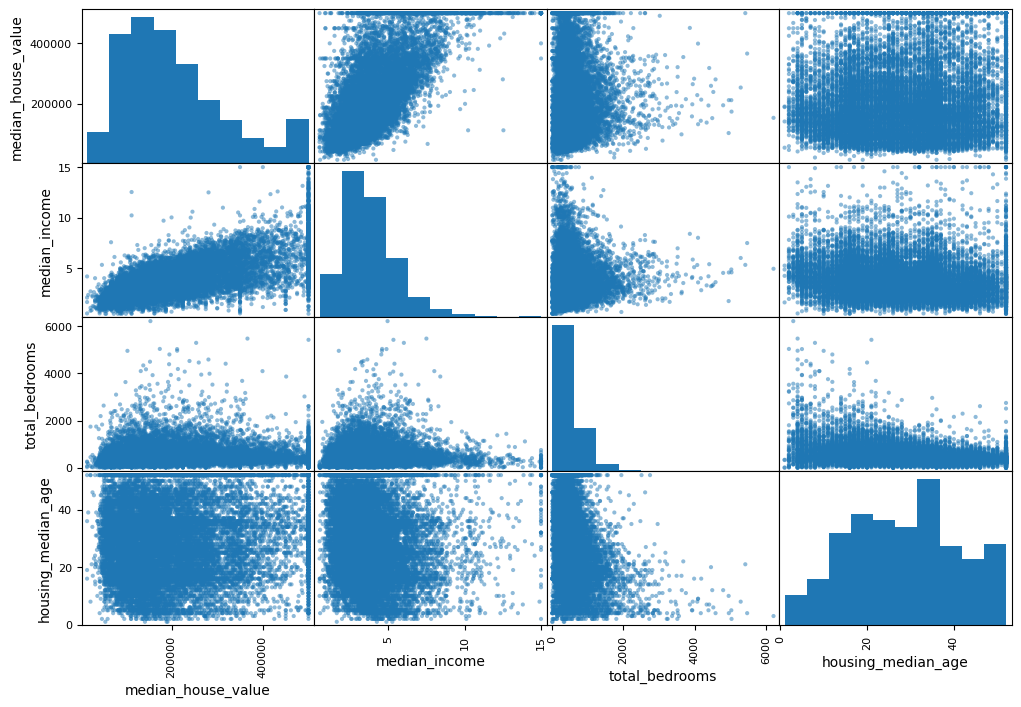

In [17]:
from pandas.plotting import scatter_matrix

atributes = ['median_house_value', 'median_income', 'total_bedrooms', 'housing_median_age']

scatter_matrix(housing[atributes], figsize=(12,8))
plt.show()

In [18]:
housing['rooms_per_house'] = housing["total_rooms"] / housing["households"]
housing['bedrooms_ratio'] = housing["total_bedrooms"] / housing["total_rooms"]
housing['people+per_house'] = housing["population"] / housing["households"]


In [19]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

<ipython-input-19-2df75c723d39>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people+per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

In [20]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_label = strat_train_set["median_house_value"].copy()

In [21]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [22]:
housing_num = housing.select_dtypes(include=[np.number])

In [23]:
imputer.fit(housing_num)

X = imputer.transform(housing_num)

In [24]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index = housing_num.index)

In [25]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN


In [39]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)

housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [44]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [46]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)
